<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Web-Mining" data-toc-modified-id="Step-1.-Web-Mining-1">Step 1. Web Mining</a></span></li><li><span><a href="#Step-2.--Exploratory-Data-Analysis-(SQL-query-on-the-Practicum-platform)" data-toc-modified-id="Step-2.--Exploratory-Data-Analysis-(SQL-query-on-the-Practicum-platform)-2">Step 2.  Exploratory Data Analysis (SQL query on the Practicum platform)</a></span></li><li><span><a href="#Step-3.--Hypothesis-Testing-(-SQL-query-on-the-Practicum-platform)" data-toc-modified-id="Step-3.--Hypothesis-Testing-(-SQL-query-on-the-Practicum-platform)-3">Step 3.  Hypothesis Testing ( SQL query on the Practicum platform)</a></span></li><li><span><a href="#Step-4.-Exploratory-Data-Analysis-(Python)" data-toc-modified-id="Step-4.-Exploratory-Data-Analysis-(Python)-4">Step 4. Exploratory Data Analysis (Python)</a></span></li><li><span><a href="#Step-5.-Hypothesis-Testing-(Python)" data-toc-modified-id="Step-5.-Hypothesis-Testing-(Python)-5">Step 5. Hypothesis Testing (Python)</a></span></li><li><span><a href="#Step-6.-General-Conclusion" data-toc-modified-id="Step-6.-General-Conclusion-6">Step 6. General Conclusion</a></span></li></ul></div>

# Patterns in the use of Taxis in Chicago

# Introductiion
As an analyst at Zuber; a new ride-sharing company that's launching in Chicago. My task is to find patterns in the available information. I want to understand passenger preferences and the impact of external factors on rides.


# Summary
I completed Steps 1 to 3 (step 1 will be reproduced in this notebook) on the Practicum by Yandex platform as follows:

## Step 1. Web Mining
I the first step, I wrote a code to parse the data on weather in Chicago in November
2017 from the website. 
## Step 2.  Exploratory Data Analysis (SQL query on the Practicum platform)
In Step 2., I did exploratory data analysis
## Step 3.  Hypothesis Testing ( SQL query on the Practicum platform)
In Step 3., I tested the hypothesis that the duration of rides from the the Loop to
O'Hare  International  Airport changes on rainy Sundays. 

**Step 1**

I will just reproduce how I parsed data on weather from the website: [URL](https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html), and continue with `Step 4.`
I imported the libraries, initiated a get request and parsed the HTML file with BeautifulSoup, I retried a table (separated it into lists with headings and row values), and converted the text/list into a DataFrame.

In [1]:
import requests 
from bs4 import BeautifulSoup
URL = "https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html"
req = requests.get(URL)
soup=BeautifulSoup(req.text, 'lxml') 

table = soup.find("table",attrs={"id": "weather_records"}) 

heading_table = [] 
for row in table.find_all('th'): 
        heading_table.append(row.text) 
    
content=[] 
for row in table.find_all('tr'): 

    if not row.find_all('th'): 

            content.append([element.text for element in row.find_all('td')])
            
import pandas as pd
weather_records = pd.DataFrame(content, columns= heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Step 4. Exploratory Data Analysis (Python)

**Importing libraries and data**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

data1= pd.read_csv("project_sql_result_01.csv")

data2= pd.read_csv("project_sql_result_04.csv")

data3= pd.read_csv("project_sql_result_07.csv")

**Studying the data  and ensuring they contain the required data  types** 

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_amount,64.0,2145.484375,3812.310186,2.0,20.75,178.5,2106.5,19558.0


The general infomation of `data1` shows the columns have the required data types and there are no missing values. However, int64 is consuming about 8 bytes of memory but the number of rows are just 64 so I will reduce the size of the dataframe on the `trips_amount`column.
The general description of `data1` shows the `trips_amount`column has a mean of about 2145.5  and a median of about 178.5. Meaning the data is highly skewed and gives a hint of potential outliers in the data. This is also evident looking at the difference between the maximum (and the 75th percental value) and minimum value.

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
data2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
average_trips,94.0,599.953728,1714.591098,1.8,14.266667,52.016667,298.858333,10727.466667


The general infomation of `data2` shows the columns have the required data types and there are no missing values. However, float64 is again consuming about 8 bytes of memory but the number of rows are just 94 so I will reduce the size of the dataframe on the `average_trips`column.
The general description of `data2` shows the `average_trips`column has a mean of about 600 trips and a median of about 52 trips. Meaning the data is again highly skewed and gives a hint of potential outliers in the data. This is as well evident looking at the difference between the maximum and minimum values.

In [9]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
data3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_seconds,1068.0,2071.731273,769.461125,0.0,1438.25,1980.0,2580.0,7440.0


The general infomation of `data3` shows the columns `start_ts` and `duration_seconds` do not have the required data types. `weather_conditions` have the required data type. `start_ts` is date and should be in datetime format, given that `duration_seconds` is only in seconds, keeping it in float only allows presence of milliseconds. Therefore, I will convert to integer data type. Again, there are no missing values.  
The general description of `data3` shows the rides from Loop to  O'Hare International Airport lasted with a mean of about 2072 seconds, and a median of about 1980 seconds. The mean and median are close but still, it shows the data is not normally distributed.

Checking for duplicates

In [12]:
data1.duplicated().sum()

0

In [13]:
data2.duplicated().sum()

0

In [14]:
data3.duplicated().sum()

197

Filtering DataFrame with duplicates

In [15]:
data3[data3.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Investigating with the first row duplicates filter

In [16]:
data3.query('(start_ts== "2017-11-11 06:00:00") & (weather_conditions=="Good") & (duration_seconds==1260)')

,start_ts,weather_conditions,duration_seconds
43,2017-11-11 06:00:00,Good,1260.0
62,2017-11-11 06:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
250,2017-11-11 06:00:00,Good,1260.0
333,2017-11-11 06:00:00,Good,1260.0
343,2017-11-11 06:00:00,Good,1260.0
725,2017-11-11 06:00:00,Good,1260.0
948,2017-11-11 06:00:00,Good,1260.0


Droping Duplicates in `data3`

In [17]:
data3.drop_duplicates(inplace=True)
data3.shape[0]

871

Converting data types and reducing memory size(s)

In [18]:
data1["trips_amount"] = pd.to_numeric(data1["trips_amount"], downcast='unsigned')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     uint16
dtypes: object(1), uint16(1)
memory usage: 768.0+ bytes


In [19]:
data2["average_trips"] = pd.to_numeric(data2["average_trips"], downcast='float')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     uint16
dtypes: object(1), uint16(1)
memory usage: 768.0+ bytes


In [20]:
data3["duration_seconds"] = data3["duration_seconds"].astype("int16")
data3["start_ts"] = pd.to_datetime(data3["start_ts"], format= "%Y-%m-%d %H:%M:%S")
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 22.1+ KB


Interim conclusion:

I have described and inspected the general information of the data, duplicates have been checked and dealt with, and have ensured all columns contains the required data types.

**Identifying the top 10 neighborhoods in terms of drop-offs**

In [21]:
top10_drop_off= data2.sort_values(by="average_trips", ascending= False).head(10)
top10_drop_off["dropoff_location_name"].tolist()

['Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

On average, the top 10 neighborhoods in terms of drop-offs are `Loop`,`River North`,`Streeterville`,`West Loop`,`O'Hare`,`Lake View`, `Grant Park`,`Museum Campus`,`Gold Coast`, and `Sheffield & DePaul`

**Plotting Graphs**

Top 10 neighborhoods by number of dropoffs

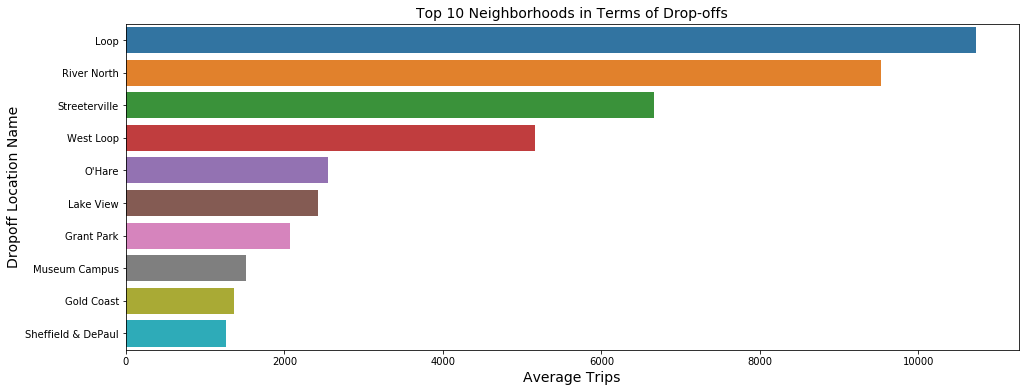

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)
sns.barplot(y="dropoff_location_name", x= "average_trips", data=top10_drop_off)  
ax.set_title("Top 10 Neighborhoods in Terms of Drop-offs", fontdict={"size":14})
plt.xlabel("Average Trips", fontdict={"size":14})
plt.ylabel("Dropoff Location Name", fontdict={"size":14})
plt.show()

On average, the neighborhood with the most drop-offs is `Loop` (about 10800 trips). Amongst the top 10, the least drop-offs is `Sheffield & DePaul` neighborhood (with about 1300 drop-offs). Only four neighborhoods have more than 5000 trips.

Taxi companies and number of rides

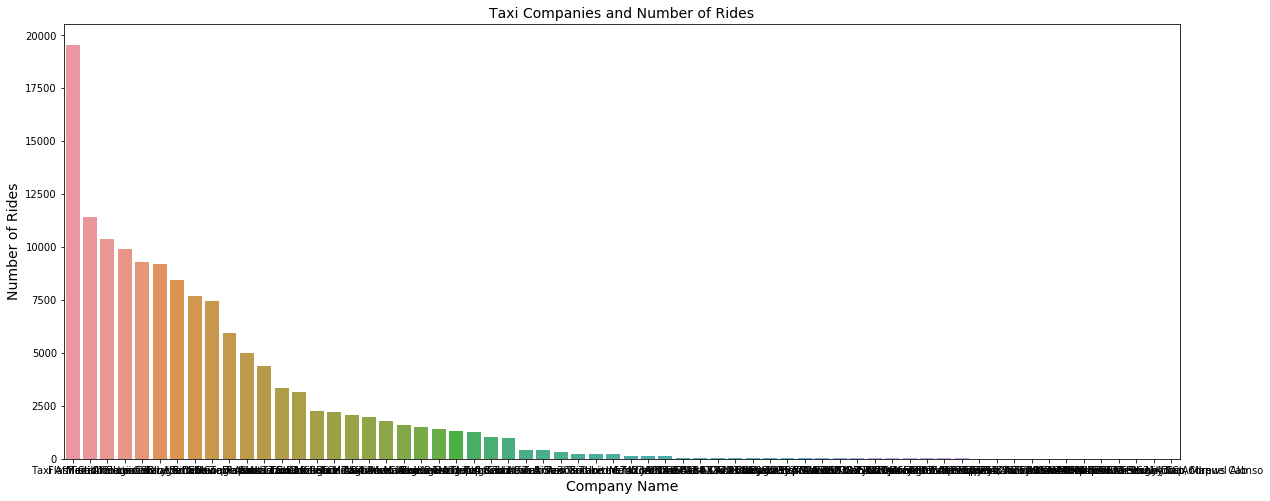

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.barplot(x="company_name", y= "trips_amount", data=data1)  
ax.set_title("Taxi Companies and Number of Rides", fontdict={"size":14})
plt.xlabel("Company Name", fontdict={"size":14})
plt.ylabel("Number of Rides", fontdict={"size":14})
plt.show()

The companies are a lot and hence the names are not displaying clearly so I will divide the task into two by filtering top 10 taxi companies and number of rides, and bottom 10 taxi companies and number of rides. I will filter with head and tail as the data is already sorted.

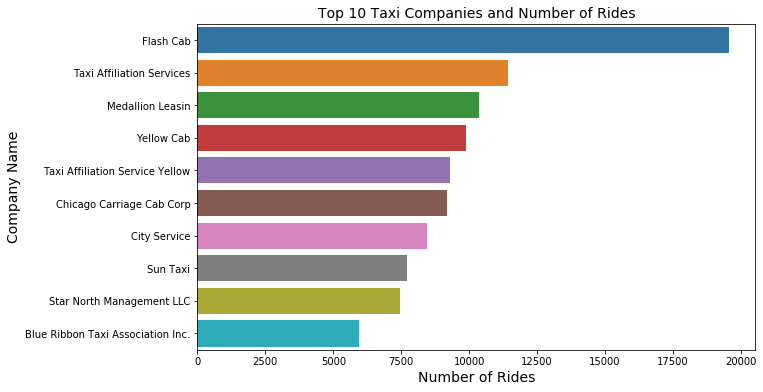

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(y="company_name", x= "trips_amount", data=data1.head(10))  
ax.set_title("Top 10 Taxi Companies and Number of Rides", fontdict={"size":14})
plt.xlabel("Number of Rides", fontdict={"size":14})
plt.ylabel("Company Name", fontdict={"size":14})
plt.show()

The Company with the highest number of rides is `Flash cub` (with about 20000 rides). This is followed by `taxi Affilöiation Services`and `Medallion Leasin` respectively.  

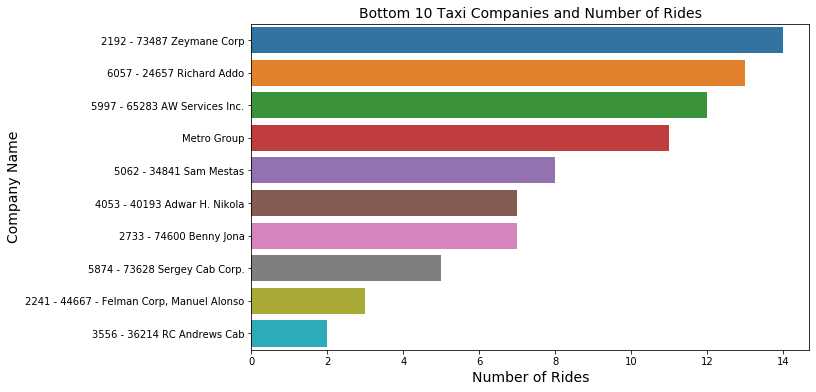

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(y="company_name", x= "trips_amount", data=data1.tail(10))  
ax.set_title("Bottom 10 Taxi Companies and Number of Rides", fontdict={"size":14})
plt.xlabel("Number of Rides", fontdict={"size":14})
plt.ylabel("Company Name", fontdict={"size":14})
plt.show()

The Company with the least number of rides is `RC Andrews Cab` (with about 2 rides). This is followed by `Felman Corp, Manuel Alonso` with about 3 rides, and `Sergey cab Corp` with about 5 rides. 

## Step 5. Hypothesis Testing (Python)

H0: The average duration of rides from the Loop to O'Hare International Airport are the same on rainy Saturdays.

H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

The initial claim is that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. This is an alternative hypothetical claim since equalitly is not assumed. I therefore, used this statement as "H1" and the opposing statement as the null hypothesis (H0). There are other significant levels such as 1% and 10% but the most used is alpha = 5%. Hence,I will choose my alpha value to be 0.05. Since the hypothsis is about testing averages, I will use a t-test.
I will filter the data into rain and no_rain samples before testing. 

In [26]:
rain = data3.query('weather_conditions=="Bad"')
not_rain=data3.query('weather_conditions=="Good"')

print("Variance:")
print("Rain = ",round(np.var(rain["duration_seconds"]),0))
print("No Rain =",round(np.var(not_rain["duration_seconds"]),0))
print()

alpha = .05 
result = st.levene(rain["duration_seconds"], not_rain["duration_seconds"])

print('p-value (levene test): {:.4f}'.format(result.pvalue))

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Variance:
Rain =  561003.0
No Rain = 597390.0

p-value (levene test): 0.9807
We can't reject the null hypothesis


In [27]:
alpha = .05 
results = st.ttest_ind(rain["duration_seconds"], not_rain["duration_seconds"])

print('p-value (t-test): {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value (t-test): 0.0000
We reject the null hypothesis


The result gives evidence to support the claim that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Step 6. General Conclusion

- On average, the top 10 neighborhoods in terms of drop-offs are `Loop`,`River North`,`Streeterville`,`West Loop`,`O'Hare`,`Lake View`, `Grant Park`,`Museum Campus`,`Gold Coast`, and `Sheffield & DePaul`
- On average, the neighborhood with the most drop-offs is `Loop` (about 10800 trips). Amongst the top 10, the least drop-offs is `Sheffield & DePaul` neighborhood (with about 1300 drop-offs)
- The top 3 companies with number of rides are `Flash cub`, `Taxi Affilöiation Services`, and `Medallion Leasin` respectively.
- The bottom 3 companies with regards to the number of rides are RC Andrews Cab (with about 2 rides), Felman Corp, Manuel Alonso with about 3 rides, and Sergey cab Corp with about 5 rides.
- The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.